In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
import glob
import time
import gc

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"
rcParams['font.sans-serif'] = ['DejaVu Sans']

%matplotlib notebook

## Merge the PS1 RF catalogs and the Gaia obvi stars catalog

In [2]:
gaia_dir = "/Users/adamamiller/Desktop/PS1_fits/gaia_stars/"
ps1_files = glob.glob("/Users/adamamiller/Desktop/PS1_fits/hdf5/*h5")

### Parallax comparison

In [2]:
gaia_df = pd.read_hdf(gaia_dir + "parallax_ps1_gaia_mag_pm_plx.h5")
gaia_df.set_index("objid", inplace=True)

In [5]:
tstart = time.time()
for file_num, rf_file in enumerate(ps1_files):

    rf_df = pd.read_hdf(rf_file)
    rf_df.set_index("objid", inplace=True)
    
    tmp_df = gaia_df.join(rf_df, how='inner')
    coords = SkyCoord(np.array(tmp_df.raStack)*u.deg, np.array(tmp_df.decStack)*u.deg)
    tmp_df["b"] = coords.galactic.b
    tmp_df.to_hdf(gaia_dir + "tmp{}.h5".format(file_num), "d1")
    if file_num == 0:
        print(file_num, rf_file.split("/")[-1], 
              len(tmp_df),
              time.time() - tstart)
    else:
        print(file_num, rf_file.split("/")[-1], 
              len(tmp_df),
              time.time() - tnow)

    tnow = time.time()
    
    del rf_df
    del tmp_df
    gc.collect()
    

0 dec_0_0_classifications.h5 94289 41.419086933135986
1 dec_0_33_classifications.h5 91933 34.60858392715454
2 dec_0_66_classifications.h5 90666 30.844307899475098
3 dec_10_0_classifications.h5 99405 31.38301682472229
4 dec_10_33_classifications.h5 97169 31.32585597038269
5 dec_10_66_classifications.h5 96525 31.302745819091797
6 dec_11_0_classifications.h5 97156 31.08215570449829
7 dec_11_33_classifications.h5 99167 31.58281397819519
8 dec_11_66_classifications.h5 100331 35.911309003829956
9 dec_12_0_classifications.h5 100128 30.488455057144165
10 dec_12_33_classifications.h5 101937 30.703970193862915
11 dec_12_66_classifications.h5 99107 30.97070598602295
12 dec_13_0_classifications.h5 96423 30.048285961151123
13 dec_13_33_classifications.h5 96320 31.04361581802368
14 dec_13_66_classifications.h5 97726 30.198737859725952
15 dec_14_0_classifications.h5 97197 29.813304901123047
16 dec_14_33_classifications.h5 98205 30.40588092803955
17 dec_14_66_classifications.h5 98336 30.70422887802124

144 dec_53_0_classifications.h5 121515 28.066300868988037
145 dec_53_33_classifications.h5 120767 27.928070068359375
146 dec_53_66_classifications.h5 121056 27.778514862060547
147 dec_54_0_classifications.h5 120205 27.783555030822754
148 dec_54_33_classifications.h5 120942 27.819480895996094
149 dec_54_66_classifications.h5 120548 27.542973041534424
150 dec_55_0_classifications.h5 117805 47.65267300605774
151 dec_55_33_classifications.h5 118404 48.49648928642273
152 dec_55_66_classifications.h5 117086 27.722830057144165
153 dec_56_0_classifications.h5 114708 27.714180946350098
154 dec_56_33_classifications.h5 117655 27.62304401397705
155 dec_56_66_classifications.h5 118101 27.62387204170227
156 dec_57_0_classifications.h5 115761 27.34796905517578
157 dec_57_33_classifications.h5 113306 27.324126958847046
158 dec_57_66_classifications.h5 110598 27.546737909317017
159 dec_58_0_classifications.h5 106920 27.231280088424683
160 dec_58_33_classifications.h5 103396 27.236581325531006
161 dec_

286 dec_neg14_66_classifications.h5 110093 32.007981061935425
287 dec_neg15_0_classifications.h5 112418 32.64596605300903
288 dec_neg15_33_classifications.h5 111597 32.09527802467346
289 dec_neg15_66_classifications.h5 113325 33.09901189804077
290 dec_neg16_0_classifications.h5 114012 32.67299699783325
291 dec_neg16_33_classifications.h5 112685 33.263739824295044
292 dec_neg16_66_classifications.h5 113347 32.20364689826965
293 dec_neg17_0_classifications.h5 114961 33.731241941452026
294 dec_neg17_33_classifications.h5 115535 32.53281211853027
295 dec_neg17_66_classifications.h5 115033 32.0850670337677
296 dec_neg18_0_classifications.h5 118619 32.369714975357056
297 dec_neg18_33_classifications.h5 119128 32.45751881599426
298 dec_neg18_66_classifications.h5 117530 32.25045299530029
299 dec_neg19_0_classifications.h5 115366 32.254831075668335
300 dec_neg19_33_classifications.h5 115235 32.34078121185303
301 dec_neg19_66_classifications.h5 113258 32.279906034469604
302 dec_neg1_0_classific

In [6]:
del gaia_df
gc.collect()

0

In [7]:
tmp_files = glob.glob(gaia_dir + "tmp*h5")

for file_num, tmp_file in enumerate(tmp_files[0:100]):

    exec("tmp_df{} = pd.read_hdf(tmp_file)".format(file_num))

In [8]:
df_list = [tmp_df0, tmp_df1, tmp_df2, tmp_df3, tmp_df4, tmp_df5, tmp_df6, tmp_df7, tmp_df8, tmp_df9, tmp_df10, tmp_df11, tmp_df12, tmp_df13, tmp_df14, tmp_df15, tmp_df16, tmp_df17, tmp_df18, tmp_df19, tmp_df20, tmp_df21, tmp_df22, tmp_df23, tmp_df24, tmp_df25, tmp_df26, tmp_df27, tmp_df28, tmp_df29, tmp_df30, tmp_df31, tmp_df32, tmp_df33, tmp_df34, tmp_df35, tmp_df36, tmp_df37, tmp_df38, tmp_df39, tmp_df40, tmp_df41, tmp_df42, tmp_df43, tmp_df44, tmp_df45, tmp_df46, tmp_df47, tmp_df48, tmp_df49, tmp_df50, tmp_df51, tmp_df52, tmp_df53, tmp_df54, tmp_df55, tmp_df56, tmp_df57, tmp_df58, tmp_df59, tmp_df60, tmp_df61, tmp_df62, tmp_df63, tmp_df64, tmp_df65, tmp_df66, tmp_df67, tmp_df68, tmp_df69, tmp_df70, tmp_df71, tmp_df72, tmp_df73, tmp_df74, tmp_df75, tmp_df76, tmp_df77, tmp_df78, tmp_df79, tmp_df80, tmp_df81, tmp_df82, tmp_df83, tmp_df84, tmp_df85, tmp_df86, tmp_df87, tmp_df88, tmp_df89, tmp_df90, tmp_df91, tmp_df92, tmp_df93, tmp_df94, tmp_df95, tmp_df96, tmp_df97, tmp_df98, tmp_df99, tmp_df100, tmp_df101, tmp_df102, tmp_df103, tmp_df104, tmp_df105, tmp_df106, tmp_df107, tmp_df108, tmp_df109, tmp_df110, tmp_df111, tmp_df112, tmp_df113, tmp_df114, tmp_df115, tmp_df116, tmp_df117, tmp_df118, tmp_df119, tmp_df120, tmp_df121, tmp_df122, tmp_df123, tmp_df124, tmp_df125, tmp_df126, tmp_df127, tmp_df128, tmp_df129, tmp_df130, tmp_df131, tmp_df132, tmp_df133, tmp_df134, tmp_df135, tmp_df136, tmp_df137, tmp_df138, tmp_df139, tmp_df140, tmp_df141, tmp_df142, tmp_df143, tmp_df144, tmp_df145, tmp_df146, tmp_df147, tmp_df148, tmp_df149, tmp_df150, tmp_df151, tmp_df152, tmp_df153, tmp_df154, tmp_df155, tmp_df156, tmp_df157, tmp_df158, tmp_df159, tmp_df160, tmp_df161, tmp_df162, tmp_df163, tmp_df164, tmp_df165, tmp_df166, tmp_df167, tmp_df168, tmp_df169, tmp_df170, tmp_df171, tmp_df172, tmp_df173, tmp_df174, tmp_df175, tmp_df176, tmp_df177, tmp_df178, tmp_df179, tmp_df180, tmp_df181, tmp_df182, tmp_df183, tmp_df184, tmp_df185, tmp_df186, tmp_df187, tmp_df188, tmp_df189, tmp_df190, tmp_df191, tmp_df192, tmp_df193, tmp_df194, tmp_df195, tmp_df196, tmp_df197, tmp_df198, tmp_df199, tmp_df200, tmp_df201, tmp_df202, tmp_df203, tmp_df204, tmp_df205, tmp_df206, tmp_df207, tmp_df208, tmp_df209, tmp_df210, tmp_df211, tmp_df212, tmp_df213, tmp_df214, tmp_df215, tmp_df216, tmp_df217, tmp_df218, tmp_df219, tmp_df220, tmp_df221, tmp_df222, tmp_df223, tmp_df224, tmp_df225, tmp_df226, tmp_df227, tmp_df228, tmp_df229, tmp_df230, tmp_df231, tmp_df232, tmp_df233, tmp_df234, tmp_df235, tmp_df236, tmp_df237, tmp_df238, tmp_df239, tmp_df240, tmp_df241, tmp_df242, tmp_df243, tmp_df244, tmp_df245, tmp_df246, tmp_df247, tmp_df248, tmp_df249, tmp_df250, tmp_df251, tmp_df252, tmp_df253, tmp_df254, tmp_df255, tmp_df256, tmp_df257, tmp_df258, tmp_df259, tmp_df260, tmp_df261, tmp_df262, tmp_df263, tmp_df264, tmp_df265, tmp_df266, tmp_df267, tmp_df268, tmp_df269, tmp_df270, tmp_df271, tmp_df272, tmp_df273, tmp_df274, tmp_df275, tmp_df276, tmp_df277, tmp_df278, tmp_df279, tmp_df280, tmp_df281, tmp_df282, tmp_df283, tmp_df284, tmp_df285, tmp_df286, tmp_df287, tmp_df288, tmp_df289, tmp_df290, tmp_df291, tmp_df292, tmp_df293, tmp_df294, tmp_df295, tmp_df296, tmp_df297, tmp_df298, tmp_df299, tmp_df300, tmp_df301, tmp_df302, tmp_df303, tmp_df304, tmp_df305, tmp_df306, tmp_df307, tmp_df308, tmp_df309, tmp_df310, tmp_df311, tmp_df312, tmp_df313, tmp_df314, tmp_df315, tmp_df316, tmp_df317, tmp_df318, tmp_df319, tmp_df320, tmp_df321, tmp_df322, tmp_df323, tmp_df324, tmp_df325, tmp_df326, tmp_df327, tmp_df328, tmp_df329, tmp_df330, tmp_df331, tmp_df332, tmp_df333, tmp_df334, tmp_df335, tmp_df336, tmp_df337, tmp_df338, tmp_df339, tmp_df340, tmp_df341, tmp_df342, tmp_df343, tmp_df344, tmp_df345, tmp_df346, tmp_df347, tmp_df348, tmp_df349, tmp_df350, tmp_df351, tmp_df352, tmp_df353, tmp_df354, tmp_df355, tmp_df356, tmp_df357, tmp_df358, tmp_df359, tmp_df360, tmp_df361, tmp_df362, tmp_df363, tmp_df364, tmp_df365]

In [9]:
merge_df = pd.concat(df_list)

In [10]:
merge_df.to_hdf("parallax_ps1_gaia_cat_merge.h5", "d1")

In [11]:
del merge_df
gc.collect()

0

### Proper Motion comparison

In [3]:
pm_df = pd.read_hdf(gaia_dir + "pm_ps1_gaia_mag_pm_plx.h5")
pm_df.set_index("objid", inplace=True)

In [5]:
tstart = time.time()
last_quit = 30
for file_num, rf_file in enumerate(ps1_files):
    if file_num < last_quit:
        continue
        
    rf_df = pd.read_hdf(rf_file)
    rf_df.set_index("objid", inplace=True)
    
    tmp_df = pm_df.join(rf_df, how='inner')
    coords = SkyCoord(np.array(tmp_df.raStack)*u.deg, np.array(tmp_df.decStack)*u.deg)
    tmp_df["b"] = coords.galactic.b
    tmp_df.to_hdf(gaia_dir + "pm{}.h5".format(file_num), "d1")
    if file_num == last_quit:
        print(file_num, rf_file.split("/")[-1], 
              len(tmp_df),
              time.time() - tstart)
    else:
        print(file_num, rf_file.split("/")[-1], 
              len(tmp_df),
              time.time() - tnow)

    tnow = time.time()
    
    del rf_df
    del tmp_df
    gc.collect()
    

30 dec_19_0_classifications.h5 800796 490.47927618026733
31 dec_19_33_classifications.h5 803441 505.3153657913208
32 dec_19_66_classifications.h5 797890 500.23846411705017
33 dec_1_0_classifications.h5 610355 553.5933248996735
34 dec_1_33_classifications.h5 640352 684.4465179443359
35 dec_1_66_classifications.h5 653027 458.6304142475128
36 dec_20_0_classifications.h5 794646 500.07944774627686
37 dec_20_33_classifications.h5 775037 615.6037418842316
38 dec_20_66_classifications.h5 793433 449.11447191238403
39 dec_21_0_classifications.h5 783309 507.6632421016693
40 dec_21_33_classifications.h5 778636 571.3858978748322
41 dec_21_66_classifications.h5 778596 479.35382294654846
42 dec_22_0_classifications.h5 772734 387.45678877830505
43 dec_22_33_classifications.h5 762159 391.1565570831299
44 dec_22_66_classifications.h5 759374 403.75842213630676
45 dec_23_0_classifications.h5 758241 386.3645508289337
46 dec_23_33_classifications.h5 747348 380.7891561985016
47 dec_23_66_classifications.h5 7

173 dec_61_66_classifications.h5 387589 441.5496919155121
174 dec_62_0_classifications.h5 371296 378.1904990673065
175 dec_62_33_classifications.h5 380571 390.9993968009949
176 dec_62_66_classifications.h5 384651 381.1999189853668
177 dec_63_0_classifications.h5 378857 379.6456220149994
178 dec_63_33_classifications.h5 358500 377.79135394096375
179 dec_63_66_classifications.h5 344625 385.6945147514343
180 dec_64_0_classifications.h5 341989 380.1457140445709
181 dec_64_33_classifications.h5 325497 407.07633876800537
182 dec_64_66_classifications.h5 305148 392.07895708084106
183 dec_65_0_classifications.h5 288736 384.9093887805939
184 dec_65_33_classifications.h5 267586 380.8269202709198
185 dec_65_66_classifications.h5 247385 369.0037999153137
186 dec_66_0_classifications.h5 235848 373.1155300140381
187 dec_66_33_classifications.h5 225802 377.9298691749573
188 dec_66_66_classifications.h5 222624 385.65524673461914
189 dec_67_0_classifications.h5 218088 374.84373569488525
190 dec_67_33_c

In [6]:
del pm_df
gc.collect()

14

In [4]:
pm_files = glob.glob(gaia_dir + "pm*h5")

for file_num, pm_file in enumerate(pm_files):

    exec("pm_df{} = pd.read_hdf(pm_file)".format(file_num))

In [8]:
pm_list = [pm_df0, pm_df1, pm_df2, pm_df3, pm_df4, pm_df5, pm_df6, pm_df7, pm_df8, pm_df9, pm_df10, pm_df11, pm_df12, pm_df13, pm_df14, pm_df15, pm_df16, pm_df17, pm_df18, pm_df19, pm_df20, pm_df21, pm_df22, pm_df23, pm_df24, pm_df25, pm_df26, pm_df27, pm_df28, pm_df29, pm_df30, pm_df31, pm_df32, pm_df33, pm_df34, pm_df35, pm_df36, pm_df37, pm_df38, pm_df39, pm_df40, pm_df41, pm_df42, pm_df43, pm_df44, pm_df45, pm_df46, pm_df47, pm_df48, pm_df49, pm_df50, pm_df51, pm_df52, pm_df53, pm_df54, pm_df55, pm_df56, pm_df57, pm_df58, pm_df59, pm_df60, pm_df61, pm_df62, pm_df63, pm_df64, pm_df65, pm_df66, pm_df67, pm_df68, pm_df69, pm_df70, pm_df71, pm_df72, pm_df73, pm_df74, pm_df75, pm_df76, pm_df77, pm_df78, pm_df79, pm_df80, pm_df81, pm_df82, pm_df83, pm_df84, pm_df85, pm_df86, pm_df87, pm_df88, pm_df89, pm_df90, pm_df91, pm_df92, pm_df93, pm_df94, pm_df95, pm_df96, pm_df97, pm_df98, pm_df99, pm_df100, pm_df101, pm_df102, pm_df103, pm_df104, pm_df105, pm_df106, pm_df107, pm_df108, pm_df109, pm_df110, pm_df111, pm_df112, pm_df113, pm_df114, pm_df115, pm_df116, pm_df117, pm_df118, pm_df119, pm_df120, pm_df121, pm_df122, pm_df123, pm_df124, pm_df125, pm_df126, pm_df127, pm_df128, pm_df129, pm_df130, pm_df131, pm_df132, pm_df133, pm_df134, pm_df135, pm_df136, pm_df137, pm_df138, pm_df139, pm_df140, pm_df141, pm_df142, pm_df143, pm_df144, pm_df145, pm_df146, pm_df147, pm_df148, pm_df149, pm_df150, pm_df151, pm_df152, pm_df153, pm_df154, pm_df155, pm_df156, pm_df157, pm_df158, pm_df159, pm_df160, pm_df161, pm_df162, pm_df163, pm_df164, pm_df165, pm_df166, pm_df167, pm_df168, pm_df169, pm_df170, pm_df171, pm_df172, pm_df173, pm_df174, pm_df175, pm_df176, pm_df177, pm_df178, pm_df179, pm_df180, pm_df181, pm_df182, pm_df183, pm_df184, pm_df185, pm_df186, pm_df187, pm_df188, pm_df189, pm_df190, pm_df191, pm_df192, pm_df193, pm_df194, pm_df195, pm_df196, pm_df197, pm_df198, pm_df199, pm_df200, pm_df201, pm_df202, pm_df203, pm_df204, pm_df205, pm_df206, pm_df207, pm_df208, pm_df209, pm_df210, pm_df211, pm_df212, pm_df213, pm_df214, pm_df215, pm_df216, pm_df217, pm_df218, pm_df219, pm_df220, pm_df221, pm_df222, pm_df223, pm_df224, pm_df225, pm_df226, pm_df227, pm_df228, pm_df229, pm_df230, pm_df231, pm_df232, pm_df233, pm_df234, pm_df235, pm_df236, pm_df237, pm_df238, pm_df239, pm_df240, pm_df241, pm_df242, pm_df243, pm_df244, pm_df245, pm_df246, pm_df247, pm_df248, pm_df249, pm_df250, pm_df251, pm_df252, pm_df253, pm_df254, pm_df255, pm_df256, pm_df257, pm_df258, pm_df259, pm_df260, pm_df261, pm_df262, pm_df263, pm_df264, pm_df265, pm_df266, pm_df267, pm_df268, pm_df269, pm_df270, pm_df271, pm_df272, pm_df273, pm_df274, pm_df275, pm_df276, pm_df277, pm_df278, pm_df279, pm_df280, pm_df281, pm_df282, pm_df283, pm_df284, pm_df285, pm_df286, pm_df287, pm_df288, pm_df289, pm_df290, pm_df291, pm_df292, pm_df293, pm_df294, pm_df295, pm_df296, pm_df297, pm_df298, pm_df299, pm_df300, pm_df301, pm_df302, pm_df303, pm_df304, pm_df305, pm_df306, pm_df307, pm_df308, pm_df309, pm_df310, pm_df311, pm_df312, pm_df313, pm_df314, pm_df315, pm_df316, pm_df317, pm_df318, pm_df319, pm_df320, pm_df321, pm_df322, pm_df323, pm_df324, pm_df325, pm_df326, pm_df327, pm_df328, pm_df329, pm_df330, pm_df331, pm_df332, pm_df333, pm_df334, pm_df335, pm_df336, pm_df337, pm_df338, pm_df339, pm_df340, pm_df341, pm_df342, pm_df343, pm_df344, pm_df345, pm_df346, pm_df347, pm_df348, pm_df349, pm_df350, pm_df351, pm_df352, pm_df353, pm_df354, pm_df355, pm_df356, pm_df357, pm_df358, pm_df359, pm_df360, pm_df361, pm_df362, pm_df363, pm_df364, pm_df365]

In [6]:
merge_pm = pd.concat(pm_list)

In [7]:
merge_df.to_hdf("pm_ps1_gaia_cat_merge.h5", "d1")

In [10]:
del merge_pm1
gc.collect()

for file_num, pm_file in enumerate(pm_files[0:200]):
    if file_num < 100:
        continue
    exec("pm_df{} = pd.read_hdf(pm_file)".format(file_num))

pm_list2 = [pm_df100, pm_df101, pm_df102, pm_df103, pm_df104, pm_df105, pm_df106, pm_df107, pm_df108, pm_df109, pm_df110, pm_df111, pm_df112, pm_df113, pm_df114, pm_df115, pm_df116, pm_df117, pm_df118, pm_df119, pm_df120, pm_df121, pm_df122, pm_df123, pm_df124, pm_df125, pm_df126, pm_df127, pm_df128, pm_df129, pm_df130, pm_df131, pm_df132, pm_df133, pm_df134, pm_df135, pm_df136, pm_df137, pm_df138, pm_df139, pm_df140, pm_df141, pm_df142, pm_df143, pm_df144, pm_df145, pm_df146, pm_df147, pm_df148, pm_df149, pm_df150, pm_df151, pm_df152, pm_df153, pm_df154, pm_df155, pm_df156, pm_df157, pm_df158, pm_df159, pm_df160, pm_df161, pm_df162, pm_df163, pm_df164, pm_df165, pm_df166, pm_df167, pm_df168, pm_df169, pm_df170, pm_df171, pm_df172, pm_df173, pm_df174, pm_df175, pm_df176, pm_df177, pm_df178, pm_df179, pm_df180, pm_df181, pm_df182, pm_df183, pm_df184, pm_df185, pm_df186, pm_df187, pm_df188, pm_df189, pm_df190, pm_df191, pm_df192, pm_df193, pm_df194, pm_df195, pm_df196, pm_df197, pm_df198, pm_df199]
merge_pm2 = pd.concat(pm_list2)
merge_pm2.to_hdf("pm_tmp2.h5", "d1")

In [12]:
del merge_pm2
gc.collect()

for file_num, pm_file in enumerate(pm_files[0:300]):
    if file_num < 200:
        continue
    exec("pm_df{} = pd.read_hdf(pm_file)".format(file_num))
pm_list3 = [pm_df200, pm_df201, pm_df202, pm_df203, pm_df204, pm_df205, pm_df206, pm_df207, pm_df208, pm_df209, pm_df210, pm_df211, pm_df212, pm_df213, pm_df214, pm_df215, pm_df216, pm_df217, pm_df218, pm_df219, pm_df220, pm_df221, pm_df222, pm_df223, pm_df224, pm_df225, pm_df226, pm_df227, pm_df228, pm_df229, pm_df230, pm_df231, pm_df232, pm_df233, pm_df234, pm_df235, pm_df236, pm_df237, pm_df238, pm_df239, pm_df240, pm_df241, pm_df242, pm_df243, pm_df244, pm_df245, pm_df246, pm_df247, pm_df248, pm_df249, pm_df250, pm_df251, pm_df252, pm_df253, pm_df254, pm_df255, pm_df256, pm_df257, pm_df258, pm_df259, pm_df260, pm_df261, pm_df262, pm_df263, pm_df264, pm_df265, pm_df266, pm_df267, pm_df268, pm_df269, pm_df270, pm_df271, pm_df272, pm_df273, pm_df274, pm_df275, pm_df276, pm_df277, pm_df278, pm_df279, pm_df280, pm_df281, pm_df282, pm_df283, pm_df284, pm_df285, pm_df286, pm_df287, pm_df288, pm_df289, pm_df290, pm_df291, pm_df292, pm_df293, pm_df294, pm_df295, pm_df296, pm_df297, pm_df298, pm_df299]
merge_pm3 = pd.concat(pm_list3)
merge_pm3.to_hdf("pm_tmp3.h5", "d1")

In [13]:
del merge_pm3
gc.collect()

for file_num, pm_file in enumerate(pm_files):
    if file_num < 300:
        continue
    exec("pm_df{} = pd.read_hdf(pm_file)".format(file_num))

pm_list4 = [pm_df300, pm_df301, pm_df302, pm_df303, pm_df304, pm_df305, pm_df306, pm_df307, pm_df308, pm_df309, pm_df310, pm_df311, pm_df312, pm_df313, pm_df314, pm_df315, pm_df316, pm_df317, pm_df318, pm_df319, pm_df320, pm_df321, pm_df322, pm_df323, pm_df324, pm_df325, pm_df326, pm_df327, pm_df328, pm_df329, pm_df330, pm_df331, pm_df332, pm_df333, pm_df334, pm_df335, pm_df336, pm_df337, pm_df338, pm_df339, pm_df340, pm_df341, pm_df342, pm_df343, pm_df344, pm_df345, pm_df346, pm_df347, pm_df348, pm_df349, pm_df350, pm_df351, pm_df352, pm_df353, pm_df354, pm_df355, pm_df356, pm_df357, pm_df358, pm_df359, pm_df360, pm_df361, pm_df362, pm_df363, pm_df364, pm_df365]
merge_pm4 = pd.concat(pm_list4)
merge_pm4.to_hdf("pm_tmp4.h5", "d1")

In [2]:
# merge_pm1 = pd.read_hdf("pm_tmp1.h5")
# merge_pm2 = pd.read_hdf("pm_tmp2.h5")
# merge_pm3 = pd.read_hdf("pm_tmp3.h5")
merge_pm4 = pd.read_hdf("pm_tmp4.h5")
merge_df1 = pd.read_hdf("pm_tmp6.h5")

merge_df = pd.concat([merge_df1, merge_pm4])
merge_df.to_hdf("pm_ps1_gaia_cat_merge.h5", "d1")

## Start here if the merge file has already been created

### Parallax analysis

In [3]:
merge_df = pd.read_hdf("parallax_ps1_gaia_cat_merge.h5")

In [4]:
merge_df[0:10]

,pm_over_error,parallax_over_error,g_mag,raStack,decStack,qualityFlag,rf_score,b
objid,,,,,,,,
108000028669249816,83.232492,26.920013,12.128826,2.866989,0.007826,76,0.974833,-61.214089
108000029940524268,62.967979,11.970542,15.538984,2.994026,0.003205,60,1.000000,-61.258982
108000030724739778,106.435865,20.437815,14.500710,3.072415,0.007779,60,0.997500,-61.279410
108000037305462434,417.887911,50.179569,13.282494,3.730547,0.001656,28,1.000000,-61.486198
108000045395010918,24.263833,9.774562,17.020859,4.539510,0.000384,60,0.994417,-61.717035
108000050523434788,175.836593,49.341476,12.911674,5.052402,0.003696,76,0.998750,-61.849262
108000053490031481,95.195011,73.739563,13.268054,5.349069,0.000808,60,0.994167,-61.926735
108000064954225930,173.700455,15.487198,15.870447,6.495432,0.004593,60,0.995833,-62.186016
108000071830558908,133.521787,19.403772,14.231335,7.183038,0.007104,60,0.998500,-62.321417


In [8]:
print("There are {} stars with PS1 scores that pass the pxl cut".format(len(merge_df)))

There are 35599830 stars with PS1 scores that pass the pxl cut


In [25]:
np.percentile(merge_df["rf_score"], [0.2325,1.925,50,86.39,86.4])

array([ 0.50004762,  0.83      ,  0.99104167,  0.9996875 ,  1.        ])

The above percentile call reveals the following:

  - 14.6% of these Gaia stars have PS1_rf = 1
  - 50% of these Gaia stars have PS1_df > 0.99104167
  - 98.1% of these Gaia stars have PS1_df > .83 [the threshold for scanning]
  - 99.76% of these Gaia stars have PS1_df > .5 [classical classification threshold

In [26]:
high_lat = np.where(np.abs(merge_df['b'] > 30))
low_lat = np.where(np.abs(merge_df['b'] < 10))

In [27]:
col_dict = {'mustard': (226/256,153/256,48/256,1),
            'blue': (33/256,124/256,163/256, 1),
            'asphalt': (50/256,56/256,77/256, 1),
            'pale_mustard': (226/256,153/256,48/256,0.4),
            'pale_blue': (33/256,124/256,163/256,0.4),
            'pale_asphalt': (50/256,56/256,77/256,0.4)
           }
thresh = 0.83 #for nDet>2 sources

<IPython.core.display.Javascript object>


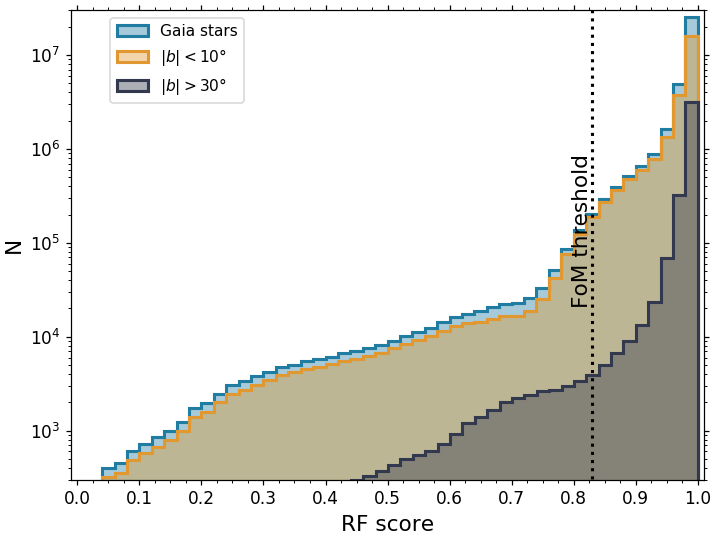

In [28]:
fig, ax = plt.subplots()
ax.hist(merge_df["rf_score"], bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['blue'], linewidth=2,
        facecolor=col_dict['pale_blue'], label="Gaia stars")
ax.hist(merge_df["rf_score"].iloc[low_lat], bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['mustard'], linewidth=2,
        facecolor=col_dict['pale_mustard'], label=r"$|b| < 10\degree$")

ax.hist(merge_df["rf_score"].iloc[high_lat], bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['asphalt'], linewidth=2,
        facecolor=col_dict['pale_asphalt'], label=r"$|b| > 30\degree$")

ax.set_yscale("log")
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(3e2, 3e7)
ax.tick_params(which="both", top=True, right=True, labelsize=11)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.025))
ax.set_xlabel("RF score", fontsize=14)
ax.set_ylabel("N", fontsize=14)

ax.vlines([thresh], 10, 1e9, 
          linestyles=":", 
          color='k', lw=2, zorder=11)
ax.text(thresh, 6e5, 'FoM threshold', 
        color='k', 
        rotation=90, ha="right", fontsize=14)
ax.text(thresh, 4e7, r'$\longleftarrow \mathrm{Galaxies}$ ', 
        color='k', 
        ha="right", fontsize=13)
ax.text(thresh, 4e7, r' $\mathrm{Stars} \longrightarrow$', 
        color='k', 
        ha="left", fontsize=13)

ax.legend(loc=2, bbox_to_anchor = (0.05,0,1,1), 
          bbox_transform=ax.transAxes)

fig.subplots_adjust(left=0.1,right=0.99,top=0.98,bottom=0.1)
fig.savefig("../paper/Figures/Gaia_PS1_cat_hist.pdf")

In [ ]:
fig, ax = plt.subplots()
ax.hist(merge_df["rf_score"][0:100000], bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['blue'], linewidth=2,
        facecolor=col_dict['pale_blue'], label="Gaia stars")
ax.set_yscale('log')

### Proper Motion Analysis

In [5]:
merge_df = pd.read_hdf("parallax_ps1_gaia_cat_merge.h5")

225682755

In [6]:
print("There are {} stars with PS1 scores that pass the pxl cut".format(len(merge_df)))

There are 225682755 stars with PS1 scores that pass the pxl cut


In [18]:
np.percentile(merge_df["rf_score"], [0.552,5.551,50,91.7])

array([ 0.5       ,  0.83019643,  0.97919643,  1.        ])

The above percentile call reveals the following:

  - 8.3% of these Gaia stars have PS1_rf = 1
  - 50% of these Gaia stars have PS1_df > 0.97919643
  - 94.45% of these Gaia stars have PS1_df > .83 [the threshold for scanning]
  - 99.45% of these Gaia stars have PS1_df > .5 [classical classification threshold

In [19]:
high_lat = np.where(np.abs(merge_df['b'] > 30))
low_lat = np.where(np.abs(merge_df['b'] < 10))

In [20]:
col_dict = {'mustard': (226/256,153/256,48/256,1),
            'blue': (33/256,124/256,163/256, 1),
            'asphalt': (50/256,56/256,77/256, 1),
            'pale_mustard': (226/256,153/256,48/256,0.4),
            'pale_blue': (33/256,124/256,163/256,0.4),
            'pale_asphalt': (50/256,56/256,77/256,0.4)
           }
thresh = 0.83 #for nDet>2 sources

<IPython.core.display.Javascript object>


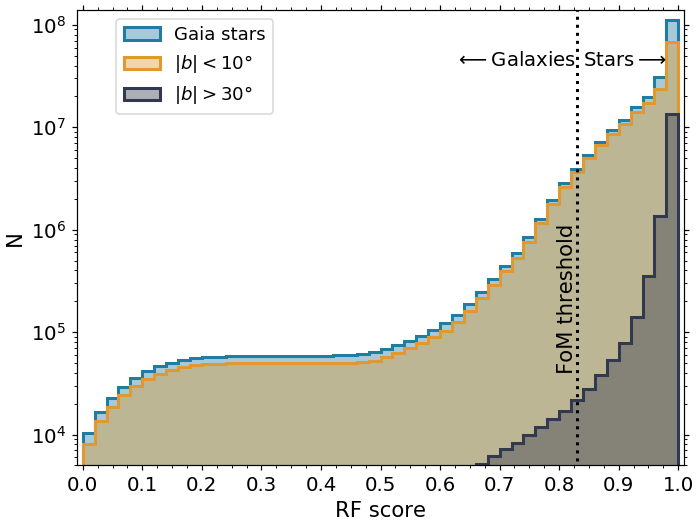

In [34]:
fig, ax = plt.subplots()
ax.hist(merge_df["rf_score"], range=(0,1), bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['blue'], linewidth=2,
        facecolor=col_dict['pale_blue'], label="Gaia stars")
ax.hist(merge_df["rf_score"].iloc[low_lat], range=(0,1), bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['mustard'], linewidth=2,
        facecolor=col_dict['pale_mustard'], label=r"$|b| < 10\degree$")

ax.hist(merge_df["rf_score"].iloc[high_lat], range=(0,1), bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['asphalt'], linewidth=2,
        facecolor=col_dict['pale_asphalt'], label=r"$|b| > 30\degree$")

ax.set_yscale("log")
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(5e3, 1.4e8)
ax.tick_params(which="both", top=True, right=True, labelsize=13)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.025))
ax.set_xlabel("RF score", fontsize=14)
ax.set_ylabel("N", fontsize=14)

ax.vlines([thresh], 10, 3e10, 
          linestyles=":", 
          color='k', lw=2, zorder=11)
ax.text(thresh, 8e5, 'FoM threshold', 
        color='k', 
        rotation=90, ha="right", fontsize=14)
ax.text(thresh, 4e7, r'$\longleftarrow \mathrm{Galaxies}$ ', 
        color='k', 
        ha="right", fontsize=13)
ax.text(thresh, 4e7, r' $\mathrm{Stars} \longrightarrow$', 
        color='k', 
        ha="left", fontsize=13)

ax.legend(loc=2, bbox_to_anchor = (0.05,0,1,1), 
          bbox_transform=ax.transAxes, fontsize=12)

fig.subplots_adjust(left=0.11,right=0.98,top=0.98,bottom=0.11)
fig.savefig("../paper/Figures/Gaia_PS1_pm_hist.pdf")

In [25]:
len(np.where(merge_df["rf_score"] >= 0.98)[0])

111121443